# <div style="color:#fff;display:fill;border-radius:10px;background-color:#004F98;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Implementation CNN </div>

## <span style='color:#2E8BC0'> 0| Import Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10

## <span style='color:#2E8BC0'> 1| Reload Data</span>

In [2]:
(x_train,y_train) , (x_test,y_tset) = cifar10.load_data()

170498071/170498071 [==============================] - 87s 1us/step


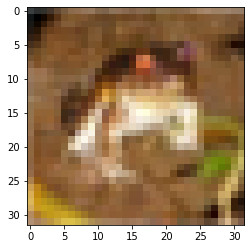

In [7]:
plt.imshow(x_train[0])

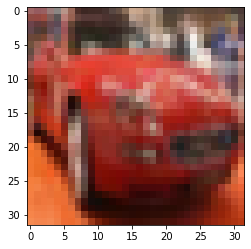

In [8]:
plt.imshow(x_train[5])

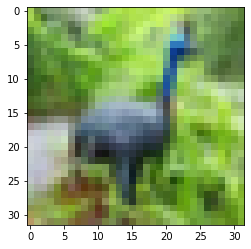

In [9]:
plt.imshow(x_train[6])

In [10]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

## <span style='color:#2E8BC0'> 2| Resize Images</span>

In [11]:
x_train = x_train/255
x_test = x_test/255

In [17]:
## ==> This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.
y_train_en = to_categorical(y_train,10)

In [18]:
y_test_en = to_categorical(y_tset,10)

## <span style='color:#2E8BC0'> 3| Building Model</span>

In [19]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [23]:
history = model.fit(x_train, y_train_en, epochs=20,verbose=1,validation_data=(x_test,y_test_en))

Epoch 1/20
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5346 - accuracy: 0.4403 - val_loss: 1.3112 - val_accuracy: 0.5285
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2187 - accuracy: 0.5691 - val_loss: 1.1971 - val_accuracy: 0.5793
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0832 - accuracy: 0.6181 - val_loss: 1.0809 - val_accuracy: 0.6140
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9903 - accuracy: 0.6535 - val_loss: 1.0545 - val_accuracy: 0.6313
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9162 - accuracy: 0.6786 - val_loss: 1.0435 - val_accuracy: 0.6375
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8584 - accuracy: 0.7010 - val_loss: 0.9845 - val_accuracy: 0.6590
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7993 - accuracy: 0.7210 - val_loss: 0.9899 - val_ac